In [1]:

using Plots
using LinearAlgebra
using ProgressMeter
using PolyChaos
using ITensors
using NDTensors
using ITensorMPS
using Observers
using JLD2
using Base.Threads

include("Chain_mapping_module.jl")
include("HamiltonianBuilding.jl")
using .Chain_mapping
using .HamiltonianBuilding

In [ ]:

function vars()
    P = Base_params()
    P.N_L = 0
    P.N_R = 100
    P.Ns = 1
    P.N_chain = 50
    P.β_L = 10
    P.β_R = 10
    P.μ_L = 0.1
    P.μ_R = 0.1
    P.Γ_L = 0.01
    P.Γ_R = 0.01
    P.D = 1
    P.spec_fun_type = "ellipse"
    P.symmetry_subspace = "Number conserving"
    P.bath_mode_type = "Fermion"
    P.sys_mode_type = "Fermion"
    P.ϵ = 0
    P.tc = 0
    P.init_occ = 0
    P.U = 0
    P.δt = 0.1
    P.T = 50
    P.Kr_cutoff = 1e-10
    P.k1 = 3
    P.τ_Krylov = 1
    P.tdvp_cutoff = 1e-9
    P.minbonddim = 10
    P.maxbonddim = 100
    P.T_enrich = 5
    P.n_enrich = 5
    return P
end;

P = vars()
P.β_L = 10
P.β_R = 10
P.D = 1
P.Γ_R = 0.1
P.init_occ = 0
P.T = 5
P.tdvp_cutoff = 1e-10
DP = DP_initialisation(P);

##propagates MPS
ψ, obs = propagate_MPS(P, DP;enrich_bool=true)
MPS_corrs = obs.corr

##propagates single particle correlation matrix
exact_corrs = propagate_correlations(P,DP)

exact_den = [corr[1,1] for corr in exact_corrs]
MPS_den = [corr[1,1] for corr in MPS_corrs]
Plots.plot(DP.times,real.(exact_den),label="Exact",lw=2)
Plots.plot!(DP.times,real.(MPS_den),label="MPS",lw=2,linestyle=:dash,xlabel="Time",ylabel="Density")

norm(ψ_init) = 1.0
1 - inner(ψ2, ψ) = 0.0 - 0.0im
After sweep 1: maxlinkdim=7 maxerr=7.77E-16 current_time=0.0 - 0.1im time=34.346
 34.956370 seconds (52.02 M allocations: 4.319 GiB, 3.40% gc time, 94.05% compilation time: <1% of which was recompilation)
sim_t = 0.1
After sweep 1: maxlinkdim=10 maxerr=6.66E-16 current_time=0.0 - 0.1im time=3.457
  3.461091 seconds (17.72 M allocations: 2.737 GiB, 6.79% gc time, 13.96% compilation time)
sim_t = 0.2
After sweep 1: maxlinkdim=10 maxerr=6.68E-16 current_time=0.0 - 0.1im time=3.632
  3.634808 seconds (22.49 M allocations: 3.455 GiB, 7.88% gc time)
sim_t = 0.30000000000000004
After sweep 1: maxlinkdim=10 maxerr=7.80E-16 current_time=0.0 - 0.1im time=5.201
  5.203376 seconds (22.98 M allocations: 3.519 GiB, 5.15% gc time, 28.29% compilation time)
sim_t = 0.4
After sweep 1: maxlinkdim=10 maxerr=7.78E-16 current_time=0.0 - 0.1im time=4.105
  4.107856 seconds (23.44 M allocations: 3.590 GiB, 6.88% gc time, 8.89% compilation time)
sim_t = 0.5
Tim

50-element Vector{Any}:
 ComplexF64[0.00017898288830614788 + 1.2795807372622225e-22im -0.00023673250381439339 - 0.013373472636573807im … -4.111998698324444e-216 + 6.09124409982712e-218im 6.043703329822459e-221 + 1.9292420307308834e-222im; -0.00023673250381439339 + 0.013373472636573805im 0.999821055931101 + 1.3142942976584578e-18im … -1.5887455933635909e-220 + 5.501933531191802e-218im -2.2405827397719102e-220 + 4.512430150265494e-219im; … ; -4.111998698324444e-216 - 6.091244099826798e-218im -1.5887455933635909e-220 - 5.501933524859895e-218im … 1.0000000000000002 + 0.0im 0.0 + 0.0im; 6.043703329822459e-221 - 1.9292420307308834e-222im -2.2405827397719102e-220 - 4.512430150265493e-219im … 0.0 + 0.0im 0.0 + 0.0im]
 ComplexF64[0.0007152997177884468 + 7.687929645727836e-22im -0.0009456221534511123 - 0.02670532561128679im … -4.3237094071217155e-212 + 6.594098116059727e-214im 1.3070749898225047e-216 + 6.552356321371566e-218im; -0.0009456221534511126 + 0.0267053256112868im 0.999285320779798 - 3.

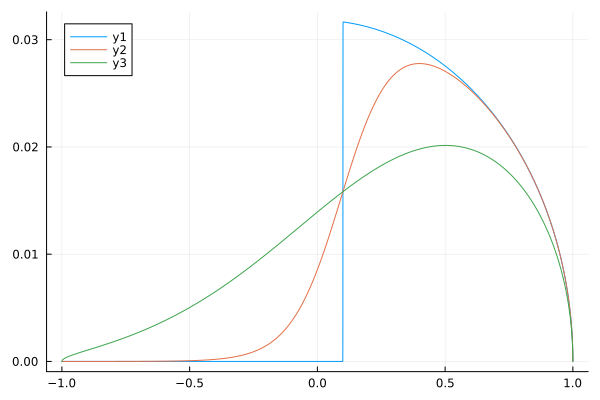

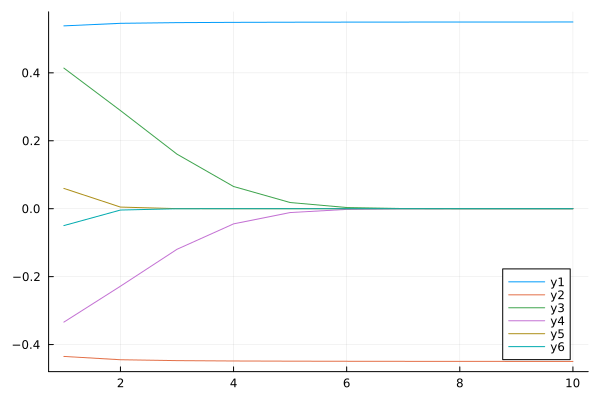

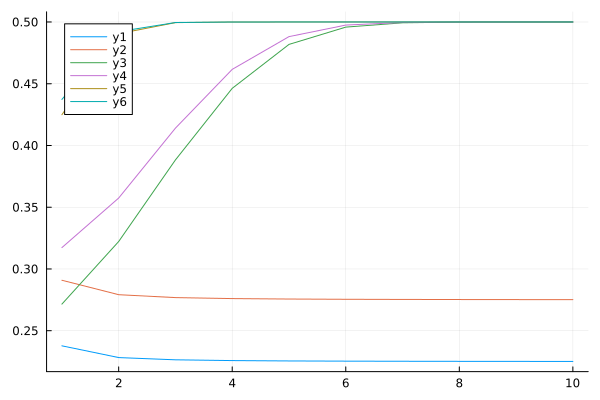

In [7]:
###Reproducing Figure 1 in https://iopscience.iop.org/article/10.1088/1742-5468/ac729b/pdf


##My definition of Γ is different by a factor of π/2
P.Γ_R = 0.157
P.β_R = 10000
w = LinRange(-P.D,P.D,10000)

side = "right"
t_empty_1,E_empty_1 = orthopol_chain(1,side,P)
t_filled_1,E_filled_1 = orthopol_chain(2,side,P)
J1 = spectral_function(w,1,"right",P)

P.β_R = 10
t_empty_2,E_empty_2 = orthopol_chain(1,side,P)
t_filled_2,E_filled_2 = orthopol_chain(2,side,P)
J2 = spectral_function(w,1,"right",P)

P.β_R = 2.5
t_empty_3,E_empty_3 = orthopol_chain(1,side,P)
t_filled_3,E_filled_3 = orthopol_chain(2,side,P)
J3 = spectral_function(w,1,"right",P)

Plots.plot(w,J1)
Plots.plot!(w,J2)
display(Plots.plot!(w,J3))

Plots.plot(real.(E_empty_1[2:11]))
Plots.plot!(real.(E_filled_1[2:11]))
Plots.plot!(real.(E_empty_2[2:11]))
Plots.plot!(real.(E_filled_2[2:11]))
Plots.plot!(real.(E_empty_3[2:11]))
display(Plots.plot!(real.(E_filled_3[2:11])))

Plots.plot(real.(t_empty_1[2:11]))
Plots.plot!(real.(t_filled_1[2:11]))
Plots.plot!(real.(t_empty_2[2:11]))
Plots.plot!(real.(t_filled_2[2:11]))
Plots.plot!(real.(t_empty_3[2:11]))
Plots.plot!(real.(t_filled_3[2:11]))